<a href="https://colab.research.google.com/github/love-bees/dataHacker/blob/master/07_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#007 kNN - k Nearest Neighbors

Ever hear of the famous quote "A man is known by the company he keeps"? There's also a popular idea where we, as individuals, represent "the center of a circle of five people with who we spend the most time with." You might not agree with these quotes, but the basic idea of these quotes represents the kNN algorithm. For every element in a dataset, k Nearest Neighbors first defines the distance between two neighboring elements. That distance can be represented as a distance between two points. Parameter k is a chosen variable, and it represents the number of nearest points to a datapoint we're trying to analyze.

Let's define two classes of elements by building our own elements of classes. Let elements of class 1 be points in a coordinate system with positive coeficients, and elements of class 2 with negative coeficients.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
X = np.array([[3,2],[2,4],[3,3],[1,4],[2,2],[-2,-3],[-3,-4],[-5,-2],[-1,-2],[-3,-3]])

In [0]:
y = np.array([1,1,1,1,1,2,2,2,2,2,])

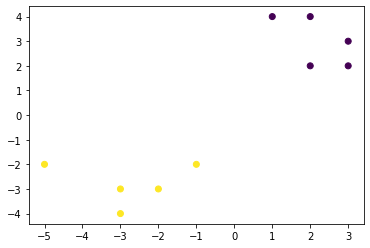

In [4]:
plt.scatter(X[:,0],X[:,1],c=y);

In this example, we will show a new classificatipon algorithm. It's name is kNN - k Nearest Neighbors. In the next picture, we can see the basic principle of operation of the kNN algorithm.

Imagine that we get a new point (2,1) which represents our test set. Our job is to determine if it belongs to class 1 or class 2. Parameter k in the kNN algorithm is set to the value 3. Usually we choose an odd number and we will soon see why that is. Let's find the 3 nearest points to our test point. The easiest way to illustrate this is to visually find 3 closest points.

In [0]:
x_test_1 = np.array ([[2,1]])

In [6]:
x_test_1.shape

(1, 2)

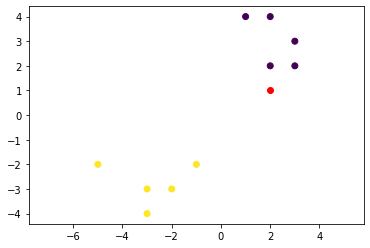

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(x_test_1[0,0],x_test_1[0,1],c='r')
# Since we're trying to calculate the distance between the points, it's good practice to set 
# axis to "equal" so that we will have the same length on the x and y axis.
plt.axis('equal');

Our test point is "surrounded" by elements of class 1, meaning 3 of the closest points to it belong to class 1. kNN algorithm will count this and apply the majority vote: 3-0 in favor of class 1. Because of this, our new point will be assigned to class 1. Let's look at how that flows when we apply the kNN algorithm, which we can find in the library sklearn.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# We're defining an instance of kNN, and for k we're choosing 3. 
# This can be acheived by setting the parameter n_neighbors when creating the initial object
kNN = KNeighborsClassifier(n_neighbors=3)

In [11]:
# We're forwarding the input data to our algorithm
# kNN is actually one of the few algorithms that, after passing input, only receives data
kNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# The algorithm itself will work once we give it a test set and once we run the command predict
# It first finds 3 (or k) closest points, then it checks their classes and runs the "majority vote"

In [13]:
kNN.predict(x_test_1.reshape(1,-1))

array([1])

In [0]:
# kNN applied to Iris dataset

In [0]:
# Importing the Iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [0]:
# Let's divide teh dataset into training and test sets "by hand"
# This process will give us a little more intuition on how the selection is done and how we can do this
# by ourselves, without using the function train_test_split()

In [18]:
# creating all indexes for our set, which has 150 elements
all_indexes = np.arange(150)
print(all_indexes)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]


In order to choose the flowers in a random manner from all three sets, we can use the command `.random.shuffle()`. Instead of directly indexing which elements we will use for training and which for testing, we can take our ordered list of indexes and shuffle it. We acheive this using the before mentioned command `.random.shuffle(list)` which randomy permutes our ordered list. Let's see how it applies to a simple example:

In [22]:
# we can find shuffle in the random library
example = np.arange(5)
print(example)
np.random.shuffle(example)
print(example)

[0 1 2 3 4]
[4 3 2 1 0]


We can see how the elements in the second list always change. Let's now do something similar to our Iris dataset.

In [23]:
# shuffle all the indexes
np.random.shuffle(all_indexes)
print (all_indexes)

[ 23  90  94  97  45 148  85 141  46  30  64  22  66 125  41  73  26  11
 106  59  69 138  20 139  74  81 121   7  92  93 136  33  16 102  68 104
  19 103 128  10  50  95  99 127  31  27  65  51  55  76  42   0  70  63
 134  56 105 110  96   6  84  86  87 116 101  80  28  62 117 131  34 142
  91  37  38 107  40  71  12 144  39  29 123 129  89 100  79 115  25   8
  32 120  57  78 140 133   4   1   2  82   5  13  98  54  61  21 135  18
 130 118  75  47 145  43 114  83 113 137 149  77 111 119   9  24  52  72
 112  44  67  60  35   3  49  17 108  53 132 124  58 109 122 146  14  88
  48 147  15 143 126  36]


This is exactly what we were looking for. The indexes are ordered in a completely random order. The first 80% of the data we will use to create our training dataset. The remaining 20% we will use for making a test dataset.

In [0]:
indexes_train = all_indexes[:120] # 120 = 0.80 * 150
X_train = X[indexes_train,:]
y_train = y [indexes_train]

In [0]:
indexes_test = all_indexes [120:]
X_test = X[indexes_test,:]
y_test = y [indexes_test]

In [0]:
# Let's train our kNN classifier now. Let k = 5

In [27]:
kNN=KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_knn_predicted = kNN.predict(X_test)

In [29]:
sum(y_knn_predicted == y_test) / len(y_test)

1.0

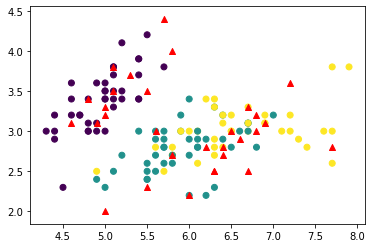

In [30]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1],marker = '^', c='r');

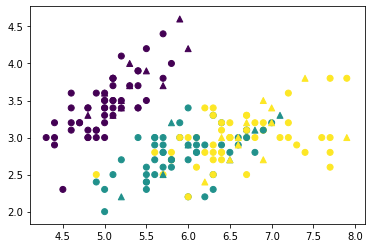

In [38]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
# Elements of the test set are displayed as triangles
plt.scatter(X_test[:,0]+0.2, X_test[:,1]+0.2,marker='^', c=y_test);

The only parameter which the algorithm kNN accepts as input is the n_neighbours, or k. The commonly used values for testing various values for k are ${3, 5, 7, 9, 11, 15, ...}$. As an exercise, try changing the parameter `n_neighbors` and check how the accuracy changes depending on the number of elements. Before we end this post, let's quickly check out how we can visualize our Iris dataset in another way. Another common library used for graphing data, apart from `matplotlib`, is `seaborn`. Seaborn allows us to make very beautiful and useful graphs for Exploratory Data Analysis - EDA.

Jedini parametar koji algoritam kNN prihvata kao ulazni podatak jeste n_neighours, odnosno k. Uobičajne vrednosti koje se uzimaju za ispitivanje različitih vrednosti k su {3, 5, 7, 9, 11, 15 …}. Radi vežbe promenite sami parametre n_neighbours i pratite kolika se tačnost postiže na test skupu. Pre nego što završimo, pogledajmo još kako možemo izvršiti vizuelizaciju iris dataset-a. Pored biblioteke matplotlib, često se koristi i biblioteka seaborn. Seaborn omogućava praveljenje veoma lepih i korisnih grafika za Exploratory Data Analysis – EDA.

In [0]:
import seaborn as sns
from pandas import DataFrame

In [0]:
sns.set()
# These three commands make our matrix into a DataFrame.
# This is described in post #009. For now, don't worry if some things look unfamiliar.
# We currently only need to focus on the result which we get from the visualization
iris = DataFrame(data=X)
iris["Class"] = y
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']

In [42]:
# this is our table Iris, and we added to it a column for Class
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


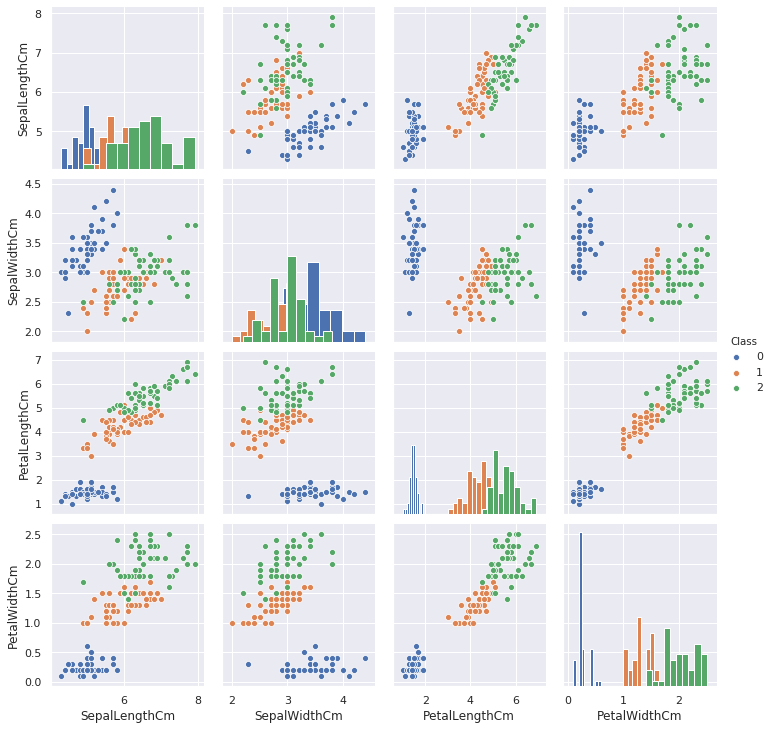

In [43]:
# Using this command, we can now plot our dataset in a few different ways
# Notice that in every one of these plots gives us an insight into a new kind of information
sns.pairplot(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Class']],hue='Class', diag_kind="hist");